<a href="https://colab.research.google.com/github/Lyes-Im/Summary-about-pandas-python/blob/main/projet_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imporatation des bibliothèques 'pandas' pour le traitement de la dataset, 'numpy' pour les calculs mathèmatiques et 'seaborn'/'matplotlib', pour la visualisation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Importation de la data set 'Medicatdataset.csv'

In [3]:
df = pd.read_csv('sample_data/Medicaldataset.csv', sep = ",")
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


> Pour savoir la dimension de notre DF et le noms de colonnes on utilise 'shape' et 'columns' respectivement



In [ ]:
df.shape

(1319, 9)

In [ ]:
df.columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')

In [ ]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


Pour savoir le type de données des features, on utilise ' **dtypes ** '

In [4]:
df.dtypes


,0
Age,int64
Gender,int64
Heart rate,int64
Systolic blood pressure,int64
Diastolic blood pressure,int64
Blood sugar,float64
CK-MB,float64
Troponin,float64
Result,object


> Encodage des variables catégorielles en utilisant LabelEncoding vu que on a deux valeurs (negative & positive), dans notre cas c'est la variable cible 'Result' de type 'object'



In [5]:
from sklearn.preprocessing import LabelEncoder
#initialisation de l'encodeur
label_encoder = LabelEncoder()
df['Result'] = label_encoder.fit_transform(df['Result'])


In [6]:
#verification de type de données
df.dtypes

,0
Age,int64
Gender,int64
Heart rate,int64
Systolic blood pressure,int64
Diastolic blood pressure,int64
Blood sugar,float64
CK-MB,float64
Troponin,float64
Result,int64


In [9]:
df.head(14)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
5,58,0,61,112,58,87.0,1.83,0.004,0
6,32,0,40,179,68,102.0,0.71,0.003,0
7,63,1,60,214,82,87.0,300.00,2.370,1
8,44,0,60,154,81,135.0,2.35,0.004,0
9,67,1,61,160,95,100.0,2.84,0.011,0


> D'aprés le resultat, on constate que la variable cible catégorielle (Result) est devenu variable numérique aprés avoir appliquer l'encoder




## Prétraitement de la DataSet
> * Dans cette étape, on vat faire le prétraitement de notre DataSet (detection des doublons, les valeurs manquantes)


In [40]:
#Renommer les colonne de notre data_frame
#(Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar) -> (Heart_rate,Systolic_blood_pressure,Diastolic_blood_pressure,Blood_sugar)

rename_colonne = {
    'Heart rate' : 'Heart_rate',
    'Systolic blood pressure' : 'Systolic_blood_pressure',
    'Diastolic blood pressure' : 'Diastolic_blood_pressure',
    'Blood sugar' : 'Blood_sugar'
    }
df = df.rename(rename_colonne, axis = 1)
df.head()


,Age,Gender,Heart_rate,Systolic_blood_pressure,Diastolic_blood_pressure,Blood_sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0




> 1. Vérification s'il y avait des doublons






In [41]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1314,False
1315,False
1316,False
1317,False


In [42]:
df.duplicated().sum()

0



> D'après le résultat de la fonction **duplicated(**), on constate que notre DataSet ne contient pas de doublons.





> 2. Voir maintenant s'il y a des valeurs manquantes.






In [43]:
df.isna().any(axis = 0)

,0
Age,False
Gender,False
Heart_rate,False
Systolic_blood_pressure,False
Diastolic_blood_pressure,False
Blood_sugar,False
CK-MB,False
Troponin,False
Result,False


In [44]:
df.isna().any(axis = 1)

,0
0,False
1,False
2,False
3,False
4,False
...,...
1314,False
1315,False
1316,False
1317,False


In [45]:
nbr_valeur_manquante_colonne = df.isna().any(axis = 0).sum()
nbr_valeur_manquante_lignes = df.isna().any(axis = 1).sum()
print(f'Nombre de valeur manquante dans les colonnes est : {nbr_valeur_manquante_colonne}')
print(f'Nombre de valeur manquante dans les lignes est : {nbr_valeur_manquante_lignes}')

Nombre de valeur manquante dans les colonnes est : 0
Nombre de valeur manquante dans les lignes est : 0




> D'aprés notre prétraitement, on constate que notre DataSet ne contient pas de valeurs manquantes



### Matrice de corrélation

In [46]:
matrice_correlation = df.corr()
print(matrice_correlation)

                               Age    Gender  Heart_rate  \
Age                       1.000000 -0.092874   -0.023440   
Gender                   -0.092874  1.000000   -0.026781   
Heart_rate               -0.023440 -0.026781    1.000000   
Systolic_blood_pressure   0.017441  0.011065    0.010882   
Diastolic_blood_pressure  0.002614 -0.009370    0.108353   
Blood_sugar              -0.004193  0.006668   -0.019584   
CK-MB                     0.018419  0.017527   -0.013001   
Troponin                  0.088800  0.065793    0.011180   
Result                    0.238097  0.094432    0.006920   

                          Systolic_blood_pressure  Diastolic_blood_pressure  \
Age                                      0.017441                  0.002614   
Gender                                   0.011065                 -0.009370   
Heart_rate                               0.010882                  0.108353   
Systolic_blood_pressure                  1.000000                  0.586166   
Dias

Text(0.5, 1.0, 'Matrice de corrélation')

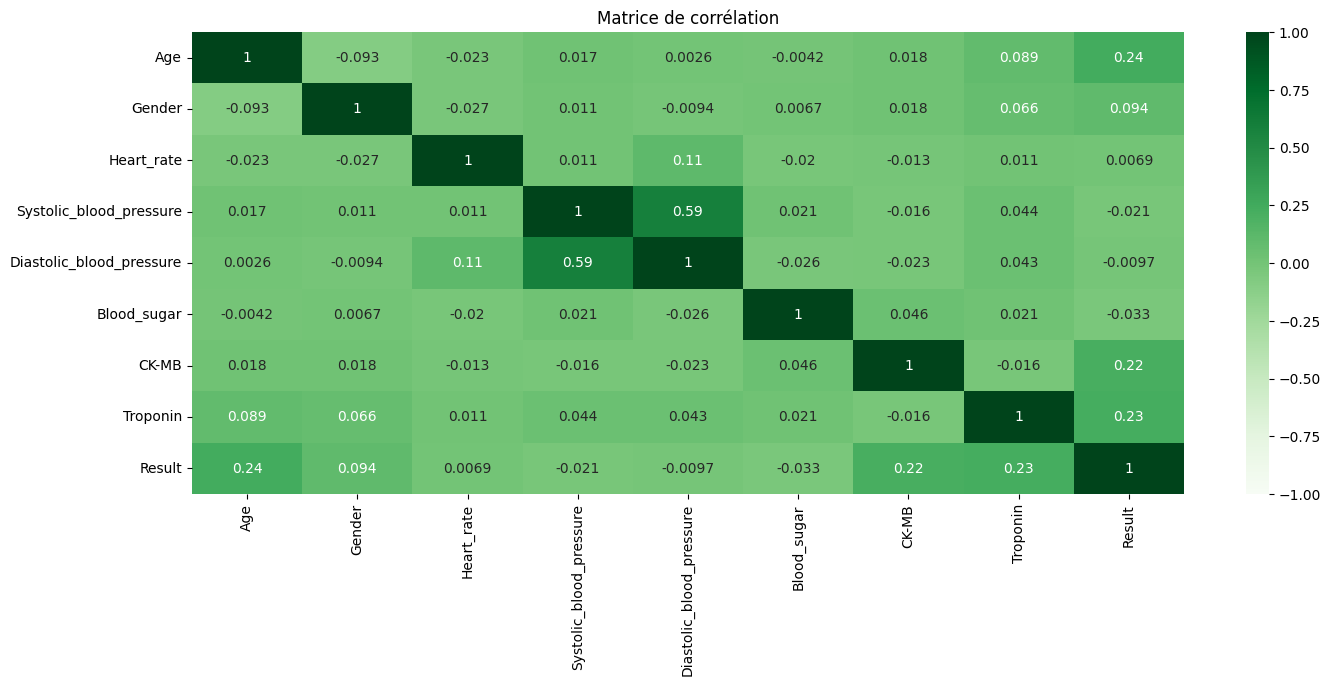

In [47]:
plt.figure(figsize=(16,6))
matrice_correlation_heatmap = sns.heatmap(matrice_correlation, vmax = 1, vmin = -1, cmap="Greens", annot = True, cbar = True)
matrice_correlation_heatmap.set_title("Matrice de corrélation" )



> Dans cette étape, nous allons diviser le dataset en un ensemble d'entrainement (80%) et de test (20%)



In [48]:
from sklearn.model_selection import train_test_split
#random_state = 1 c'est à dire : Ligne par Ligne
train_data,test_data = train_test_split(df, test_size=0.2, random_state=1)


In [49]:
%%time
print(train_data.shape)
print(test_data.shape)

(1055, 9)
(264, 9)
CPU times: user 88 µs, sys: 14 µs, total: 102 µs
Wall time: 96.6 µs



### Entrainement du modèle
> On vat préciser les features et la colonne cible, afin de faire un entrainement de notre modèle.



In [59]:
X_train = ['Age','Gender','Heart_rate','Systolic_blood_pressure','Diastolic_blood_pressure','Blood_sugar','CK-MB','Troponin']
#Serie pandas unidimentionnel
y_train = train_data['Result']
print(y_train)

710     1
1258    0
435     1
987     1
1286    0
       ..
715     1
905     0
1096    1
235     1
1061    1
Name: Result, Length: 1055, dtype: int64


In [60]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 100, random_state=42)
model.fit(train_data[X_train],y_train)


RandomForestClassifier(random_state=42)



> Faire la prédiction



In [62]:
y_pred = model.predict(test_data[X_train])


### Métrique de performance
> Matrice de confusion



In [71]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_test = test_data['Result']
matrice_de_confusion = confusion_matrix(y_test,y_pred)

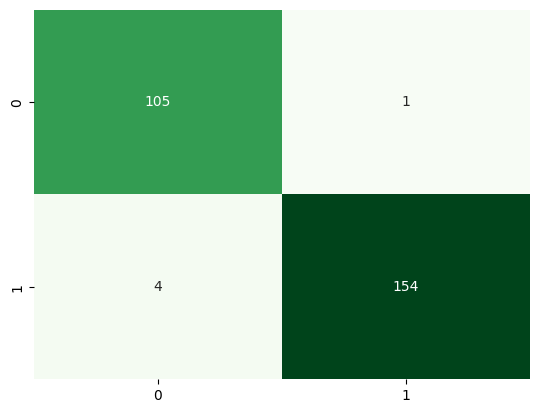

In [76]:
confusion_matrix = sns.heatmap(matrice_de_confusion, cmap = "Greens",annot=True,fmt='d', cbar = False)

In [72]:
accuracy = accuracy_score(y_test,y_pred)
print(f"l'accuracy est : {accuracy}")

l'accuracy est : 0.9810606060606061
